# Recommender Systems

[Movielens](https://grouplens.org/datasets/movielens/)

In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
df = pd.merge(ratings, movies, on='movieId')

In [6]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [9]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [10]:
rating.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


In [11]:
rating['n_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


## EDA 


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

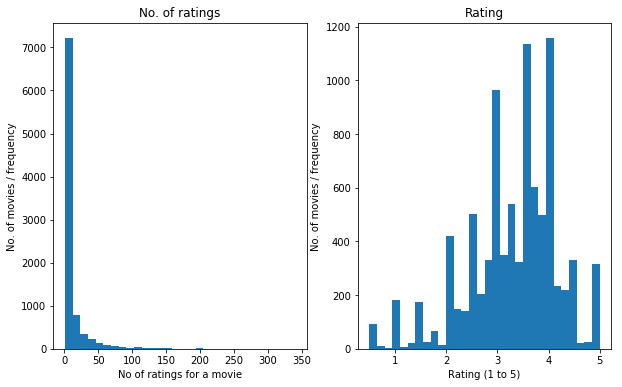

In [13]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

# For no. of ratings 
ax1.set_title('No. of ratings')
ax1.hist(rating['n_ratings'], bins =30);
ax1.set_xlabel('No of ratings for a movie')
ax1.set_ylabel('No. of movies / frequency')

# For rating
ax2.set_title('Rating')
ax2.hist(rating['rating'], bins =30);
ax2.set_xlabel('Rating (1 to 5)')
ax2.set_ylabel('No. of movies / frequency');

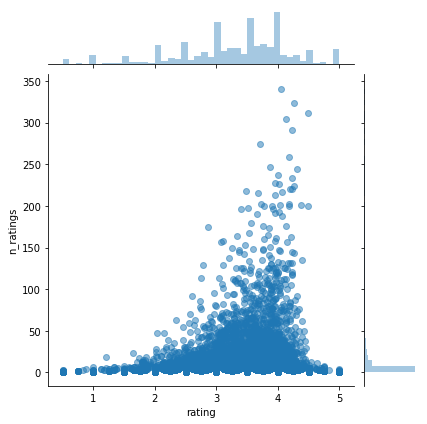

In [14]:
sns.jointplot(x='rating',y='n_ratings',data=rating,alpha=0.5);

In [15]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [16]:
rating_mat = df.pivot_table(index='userId',
                            columns='title',
                            values='rating')

In [17]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
rating.sort_values('n_ratings', ascending=False).head(10)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


In [19]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [20]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [21]:
#Getting ratings from rating_mat
FG_user_ratings = rating_mat['Forrest Gump (1994)']
Matrix_user_ratings = rating_mat['Matrix, The (1999)']
#Displaying the heads
FG_user_ratings.head(), Matrix_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64, userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

In [22]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)#.head(10)
similar_to_matrix = rating_mat.corrwith(Matrix_user_ratings)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Dell\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [23]:
corr_FG = pd.DataFrame(similar_to_FG, columns = ['correlation'])
corr_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


Let's drop NaN and check the head again!

In [24]:
corr_FG.dropna(inplace=True)
corr_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


Let's do the same for matrix (similar_to_matrix)

In [25]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns = ['correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.056624
(500) Days of Summer (2009),0.368837
*batteries not included (1987),0.743955
...And Justice for All (1979),-0.610170


So, in the recently created dataframes (corr_FG and corr_matrix), the index is the title of the movie whereas the correlation column tells how correlated the user rating of Forrest Gump and Matrix are to the user rating of the other movies. <br>
In principle, if we sort our dataframes by correlation, we should get the most similar movies to Forrest Gump and Matrix in order, in the respective dataframes. <br>

Let's see if this works for matrix movie only. (you can do the same for Forrest Gump after this)

In [26]:
corr_matrix.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Project X (2012),1.0
Southland Tales (2006),1.0
Savages (2012),1.0
Escape from Alcatraz (1979),1.0
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",1.0
Cria Cuervos (1976),1.0
Balls of Fury (2007),1.0
"Big Bounce, The (2004)",1.0
No Holds Barred (1989),1.0


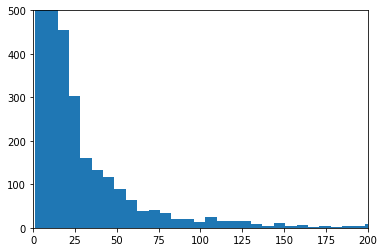

In [27]:
plt.hist(rating['n_ratings'], bins=50);
plt.ylim(0,500);
plt.xlim(0,200);

In [28]:
corr_matrix = corr_matrix.join(rating['n_ratings'])
corr_matrix.head()

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13


We need to sort the values in order from high to low!<br>

In [29]:
corr_matrix[corr_matrix['n_ratings']>50].sort_values(
    'correlation',ascending=False).head()

,correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200


In [30]:
corr_FG = corr_FG.join(rating['n_ratings'])
corr_FG[corr_FG['n_ratings']>50].sort_values(
    'correlation',ascending=False).head()

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65
